In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Uncleaned_employees_final_dataset.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
df.shape

(17417, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [6]:
print(df.describe(include='all'))

         employee_id         department    region  education gender  \
count   17417.000000              17417     17417      16646  17417   
unique           NaN                  9        34          3      2   
top              NaN  Sales & Marketing  region_2  Bachelors      m   
freq             NaN               5458      3918      11519  12314   
mean    39083.491129                NaN       NaN        NaN    NaN   
std     22707.024087                NaN       NaN        NaN    NaN   
min         3.000000                NaN       NaN        NaN    NaN   
25%     19281.000000                NaN       NaN        NaN    NaN   
50%     39122.000000                NaN       NaN        NaN    NaN   
75%     58838.000000                NaN       NaN        NaN    NaN   
max     78295.000000                NaN       NaN        NaN    NaN   

       recruitment_channel  no_of_trainings           age  \
count                17417     17417.000000  17417.000000   
unique                   

In [7]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

In [8]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

Education is categorical column so we will fill null values of education column with mode 

In [9]:
df['education'].value_counts()  #Checked existing values

education
Bachelors          11519
Masters & above     4841
Below Secondary      286
Name: count, dtype: int64

In [10]:
df['education'].fillna(df['education'].mode()[0], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20712\2668662719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode()[0], inplace=True)


In [11]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [12]:
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20712\3909758819.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)


In [13]:
df.isnull().sum()

employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(2)

In [15]:
#Remove duplicat value
df.drop_duplicates(inplace=True)

In [16]:
df.count()

employee_id              17415
department               17415
region                   17415
education                17415
gender                   17415
recruitment_channel      17415
no_of_trainings          17415
age                      17415
previous_year_rating     17415
length_of_service        17415
KPIs_met_more_than_80    17415
awards_won               17415
avg_training_score       17415
dtype: int64

In [17]:
df.dtypes

employee_id                int64
department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met_more_than_80      int64
awards_won                 int64
avg_training_score         int64
dtype: object

In [18]:
#Fix Categorical Inconsistencies
#df['department'] = df['department'].str.strip().str.lower()
categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
for i in categorical_cols:
    df[i]=df[i].str.strip().str.lower()

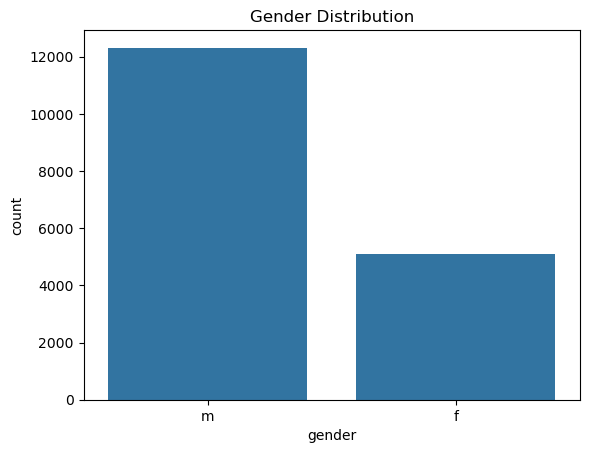

gender
m    0.706977
f    0.293023
Name: proportion, dtype: float64

In [46]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

df['gender'].value_counts(normalize=True)
#if remove the normalize = True , than it will return the output in number, not in percentage 

So based on this we can clearly see that we have more male (0.706977) in our complany compare to the female (0.293023) 

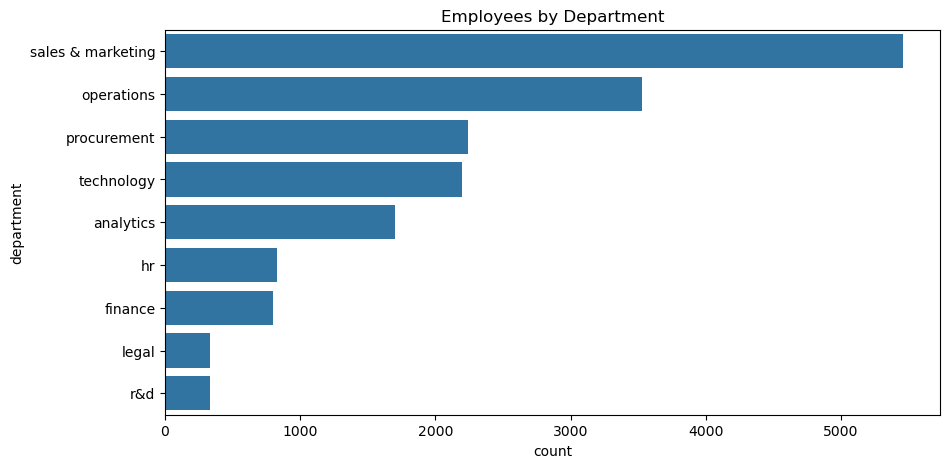

department
sales & marketing    5458
operations           3524
procurement          2240
technology           2199
analytics            1697
hr                    831
finance               802
legal                 332
r&d                   332
Name: count, dtype: int64

In [20]:
#Employee by department using seaborn
plt.figure(figsize=(10,5))
sns.countplot(y='department', data=df, order=df['department'].value_counts().index)
plt.title('Employees by Department')
plt.show()

df['department'].value_counts()

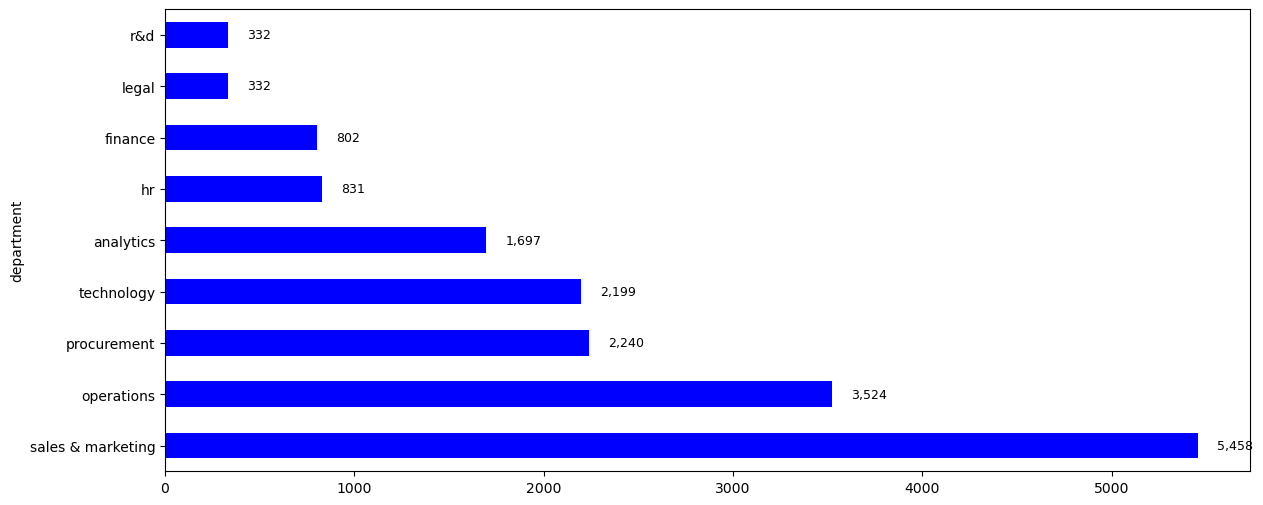

department
sales & marketing    5458
operations           3524
procurement          2240
technology           2199
analytics            1697
hr                    831
finance               802
legal                 332
r&d                   332
Name: count, dtype: int64


In [21]:
#Employee by department using matplotlib
department_counts = df['department'].value_counts()
fig,ax= plt.subplots(figsize=(14,6))
department_counts.plot(kind='barh', x='index', y='values', ax=ax, color='blue')
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + 100, 
        bar.get_y() + bar.get_height()/2,  
        f'{width:,.0f}',  
        ha='left',
        va='center', fontsize=9
    )
plt.show()
print(department_counts)

In [22]:
df.nunique()

employee_id              17414
department                   9
region                      34
education                    3
gender                       2
recruitment_channel          3
no_of_trainings              9
age                         41
previous_year_rating         5
length_of_service           34
KPIs_met_more_than_80        2
awards_won                   2
avg_training_score          61
dtype: int64

sp as I can see wwith the help of this chart that we have heigst nummber of employe in sales& marketing department, and so on and leat employes ar in r&d department.

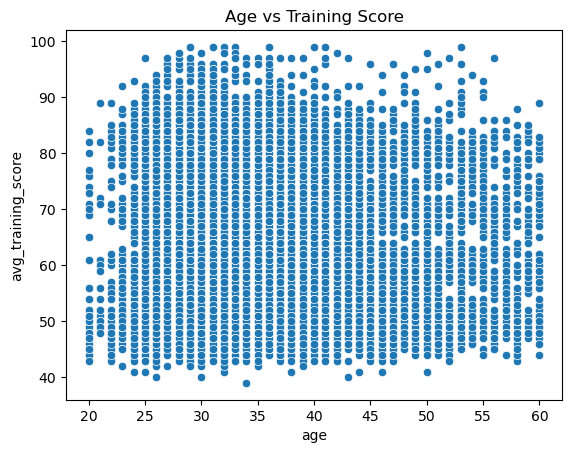

age
20    58.214286
21    56.464286
22    59.105263
23    60.224359
24    62.383142
25    62.072261
26    62.705975
27    64.067416
28    65.445748
29    64.325885
30    64.113384
31    63.451754
32    64.027855
33    63.150194
34    63.480628
35    63.376879
36    63.051881
37    62.903509
38    62.727858
39    61.899824
40    62.086444
41    61.533181
42    62.724036
43    62.578462
44    61.218868
45    61.726872
46    60.661692
47    63.192513
48    62.036810
49    60.837079
50    62.136364
51    63.289256
52    62.860465
53    62.783333
54    61.869159
55    64.362745
56    64.044444
57    62.050000
58    63.500000
59    65.526316
60    63.132353
Name: avg_training_score, dtype: float64


In [23]:
#Does age influence training scores
sns.scatterplot(x='age', y='avg_training_score', data=df)
plt.title('Age vs Training Score')
plt.show()
age_training = df.groupby('age')['avg_training_score'].mean().sort_index()
print(age_training)

##### Does age influence training scores
The scatterplot between age and avg_training_score shows no clear relationship. Employees across all age groups (20 to 60 years) have widely varied training scores ranging from 40 to 100.

Most employees scored between 50 and 80, regardless of age.

This suggests that age does not significantly influence training performance in this dataset.

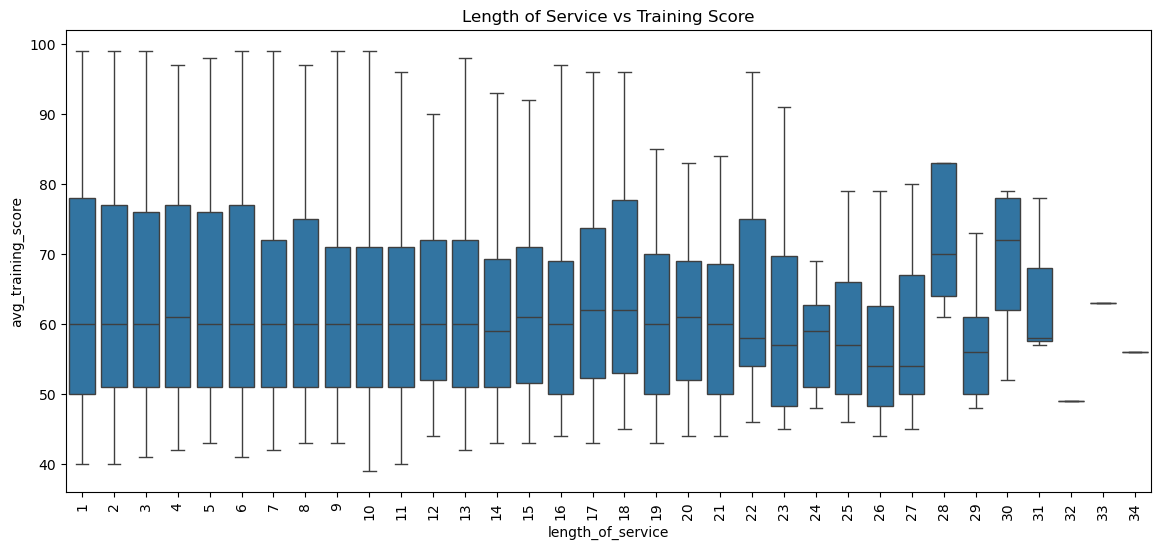

length_of_service
1     60.0
2     60.0
3     60.0
4     61.0
5     60.0
6     60.0
7     60.0
8     60.0
9     60.0
10    60.0
11    60.0
12    60.0
13    60.0
14    59.0
15    61.0
16    60.0
17    62.0
18    62.0
19    60.0
20    61.0
21    60.0
22    58.0
23    57.0
24    59.0
25    57.0
26    54.0
27    54.0
28    70.0
29    56.0
30    72.0
31    58.0
32    49.0
33    63.0
34    56.0
Name: avg_training_score, dtype: float64


In [24]:
#Does service length influence training scores
plt.figure(figsize=(14,6))
sns.boxplot(x='length_of_service', y='avg_training_score', data=df)
plt.title('Length of Service vs Training Score')
plt.xticks(rotation=90)
plt.show()
service_training = df.groupby('length_of_service')['avg_training_score'].median().sort_index()
print(service_training)



##### Does service length influence training scores
Length of service does not strongly influence training score.
The median score remains mostly stable across all service lengths, and there's no clear upward or downward trend.

In [25]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

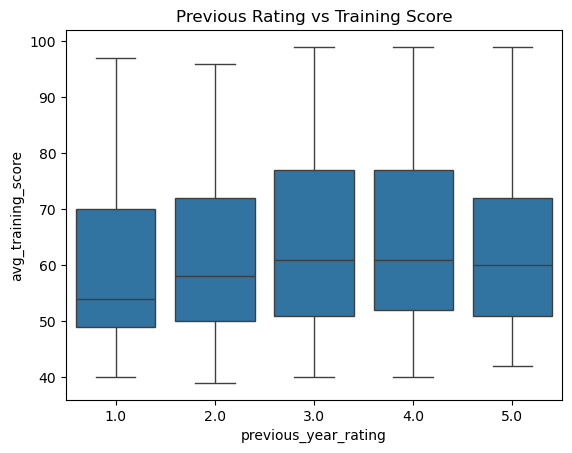

In [26]:
#Does previous year rating affect avg_training_score?
sns.boxplot(x='previous_year_rating', y='avg_training_score', data=df)
plt.title('Previous Rating vs Training Score')
plt.show()

#### Does previous year rating affect avg_training_score?
The box plot shows a slight upward trend in average training scores with higher previous year ratings.
Employees with a previous rating of 3 or 4 tend to have slightly higher median training scores compared to those rated 1 or 2.
However, the overlap between score distributions across all rating categories suggests that previous rating does not strongly determine training performance.

In [27]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

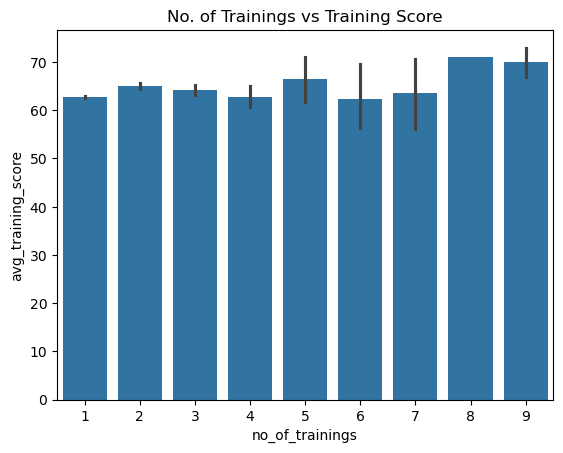

In [28]:
#How does number of trainings relate to performance
sns.barplot(x='no_of_trainings', y='avg_training_score', data=df)
plt.title('No. of Trainings vs Training Score')
plt.show()

In [29]:
training_means = df.groupby('no_of_trainings')['avg_training_score'].mean()
print(training_means)


no_of_trainings
1    62.789530
2    65.026256
3    64.220779
4    62.678832
5    66.576923
6    62.250000
7    63.666667
8    71.000000
9    70.000000
Name: avg_training_score, dtype: float64


#### number of trainings relate to performance
Training score increases slightly as number of trainings increases. Scores are highest at 8 and 9 trainings. But most values are clustered around 62–66, so the relationship is not super strong or linear.

More trainings might be slightly helpful, but it’s not the only factor affecting performance.

In [30]:
df['KPIs_met_more_than_80'].value_counts()

KPIs_met_more_than_80
0    11165
1     6250
Name: count, dtype: int64

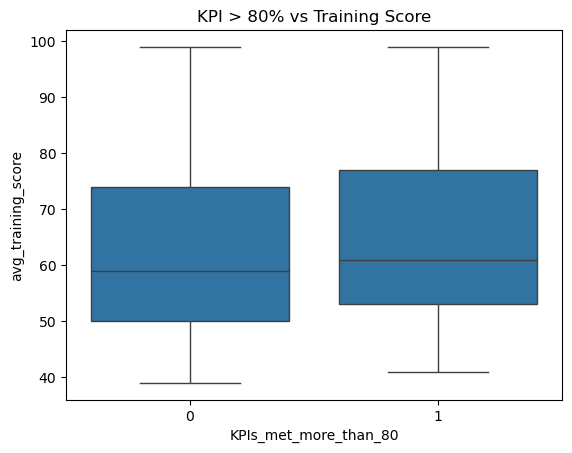

In [31]:
#Who meets KPIs? Does it affect training?
sns.boxplot(x='KPIs_met_more_than_80', y='avg_training_score', data=df)
plt.title('KPI > 80% vs Training Score')
plt.show()


In [32]:
KIP= df.groupby('KPIs_met_more_than_80')['avg_training_score'].median().sort_index()
print(f'median: {KIP}')

median: KPIs_met_more_than_80
0    59.0
1    61.0
Name: avg_training_score, dtype: float64


#### Who meets KPIs? Does it affect training?
- 0 means the employee did not meet >80% of KPIs.
- 1 means the employee did meet >80% of KPIs.

Employees who met more than 80% of their KPIs generally had slightly higher and more consistent training scores.
While both groups had a similar score range, those who met KPIs showed a higher concentration of scores in the upper half, indicating better average training performance

In [33]:
df['awards_won'].value_counts()

awards_won
0    17008
1      407
Name: count, dtype: int64

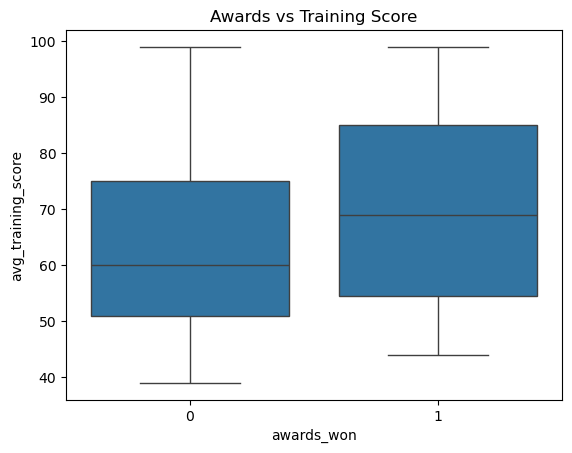

In [34]:
#Who gets awards? Does it affect training?
sns.boxplot(x='awards_won', y='avg_training_score', data=df)
plt.title('Awards vs Training Score')
plt.show()


In [35]:
Award= df.groupby('awards_won')['avg_training_score'].median().sort_index()
print(f'median: {Award}')

median: awards_won
0    60.0
1    69.0
Name: avg_training_score, dtype: float64


#### Who gets awards? Does it affect training?
Employees who have won awards generally show better training performance.
Their training scores are higher and more consistent, indicating a positive relationship between high training scores and awards received.
In contrast, non-awardees have lower and more widely spread scores.

In [36]:
df['region'].value_counts()


region
region_2     3918
region_22    1990
region_7     1486
region_13     860
region_15     843
region_26     748
region_31     646
region_4      571
region_27     516
region_16     452
region_28     430
region_11     420
region_23     376
region_32     318
region_19     315
region_29     308
region_17     268
region_14     265
region_5      252
region_25     248
region_20     242
region_6      220
region_30     209
region_10     209
region_8      209
region_1      174
region_24     165
region_12     156
region_9      134
region_21     129
region_34     123
region_3      110
region_33      91
region_18      14
Name: count, dtype: int64

In [37]:
df['region'].nunique()

34

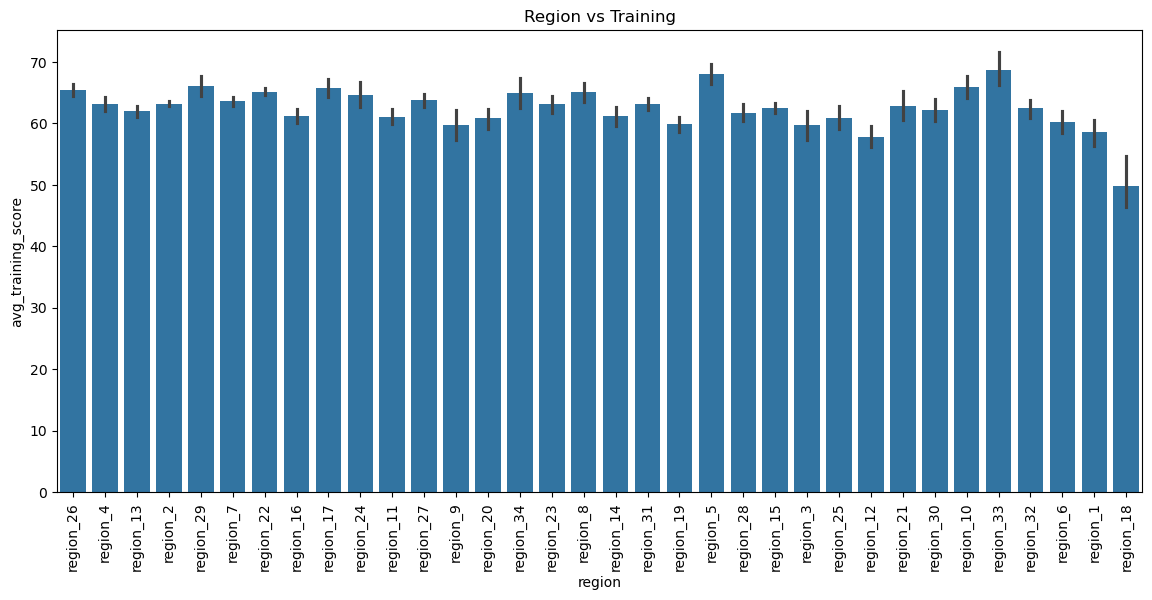

In [38]:
# Which regions have lower scores
plt.figure(figsize=(14,6))
sns.barplot(x='region', y='avg_training_score', data= df)
plt.xticks(rotation=90)
plt.title('Region vs Training')
plt.show()

In [39]:
region_training = df.groupby('region')['avg_training_score'].mean()
print(region_training)


region
region_1     58.494253
region_10    65.808612
region_11    61.080952
region_12    57.769231
region_13    61.947674
region_14    61.094340
region_15    62.469751
region_16    61.130531
region_17    65.723881
region_18    49.785714
region_19    59.819048
region_2     63.131700
region_20    60.776860
region_21    62.782946
region_22    65.118593
region_23    63.103723
region_24    64.624242
region_25    60.822581
region_26    65.346257
region_27    63.788760
region_28    61.702326
region_29    66.055195
region_3     59.681818
region_30    62.129187
region_31    63.139319
region_32    62.408805
region_33    68.659341
region_34    64.926829
region_4     63.059545
region_5     68.047619
region_6     60.190909
region_7     63.551817
region_8     64.995215
region_9     59.738806
Name: avg_training_score, dtype: float64


#### Which regions have lower scores
The average training scores vary across regions, with most regions scoring between 60 and 66.
However, region_18 stands out with the lowest average score of just 49.78, indicating a potential performance issue.
Other underperforming regions include region_12 (57.7), region_1 (58.5), and region_3 (59.6).
In contrast, region_33 (68.7) and region_5 (68.0) are top-performing regions with notably higher training scores.

In [40]:
df['recruitment_channel'].value_counts()

recruitment_channel
other       9749
sourcing    7349
referred     317
Name: count, dtype: int64

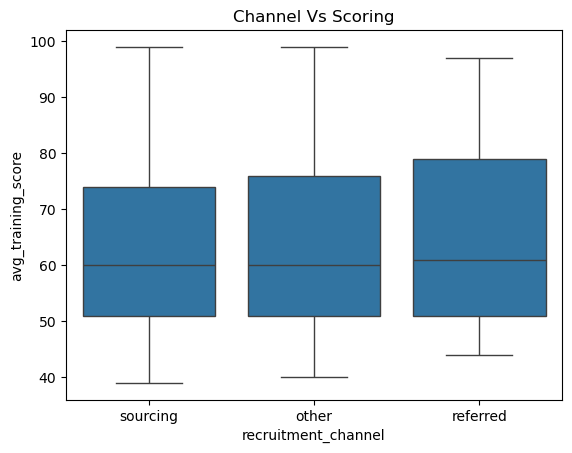

In [41]:
# which channels have lower scores?
sns.boxplot(x='recruitment_channel', y='avg_training_score', data = df)
plt.title('Channel Vs Scoring')
plt.show()

In [42]:
Channel_score = df.groupby('recruitment_channel')['avg_training_score'].median().sort_values(ascending=False)
print(Channel_score)

recruitment_channel
referred    61.0
other       60.0
sourcing    60.0
Name: avg_training_score, dtype: float64


#### which channels have lower scores
Across the recruitment channels, the median training scores are quite similar — referred (61), other (60), and sourcing (60).
However, the "referred" channel shows a slightly better upper range, indicating that it tends to produce more high-scoring candidates.
All channels have similar lower limits (~40), but referred employees may have a slight edge in training performance overall.

In [43]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

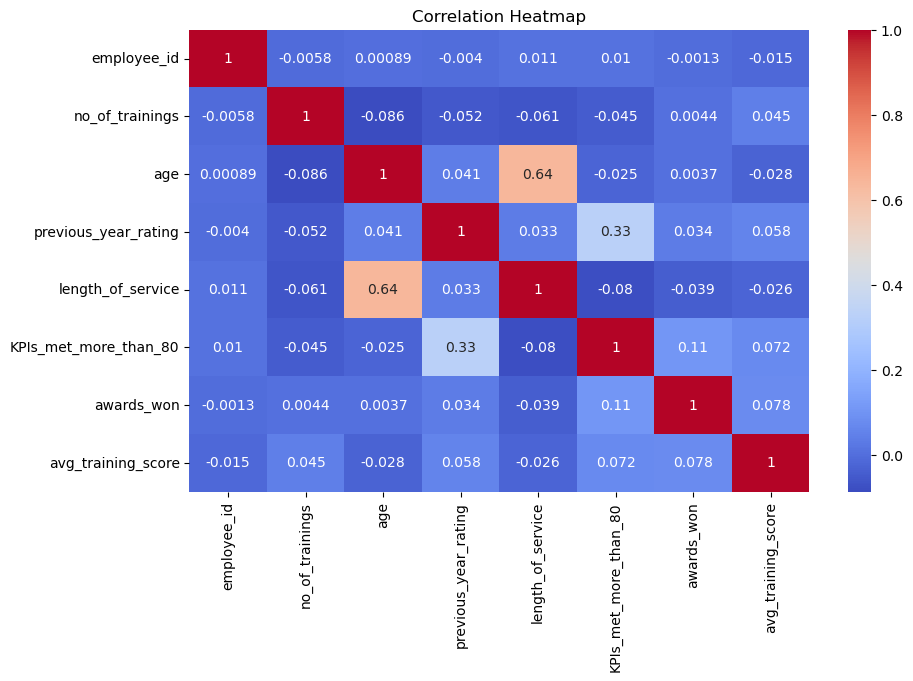

In [44]:
#Are there correlations among numeric features?
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#### Are there correlations among numeric features?
The strongest correlation observed is between age and length_of_service (0.64), indicating that older employees tend to have longer tenure.
A moderate positive relationship (0.33) exists between meeting KPIs and having a good previous year rating.
There are weak but positive links between awards won and average training score (0.078), as well as KPI success and awards won (0.11).
Most other features, including no_of_trainings, show little to no linear correlation with training performance.

### INSIGHT

Based on analysis of employee performance data, we found that training quality matters more than quantity, and certain hiring channels consistently bring in better performers. We recommend shifting resources to the top departments and supporting weaker regions. These steps will help improve overall productivity and employee development.